# Dataset Titanic
**Avaliação para Monitoria SAOP09: Data Science for Business**  \
**Candidato**: Erickson Leon Kovalski \
**Contato**: leon.erickson@ufpr.br

## Carregamento das bibliotecas que serão usadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

## Carregamento do dataset

In [2]:
# Carregar o conjunto de dados Titanic
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


## Descrição das Colunas do Conjunto de Dados Titanic

In [3]:
titanic_data.shape

(891, 12)

O dataset possui 891 linhas e 12 colunas

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O conjunto de dados Titanic contém 891 entradas e 12 colunas. A seguir, uma descrição detalhada de cada coluna:

1. **PassengerId**:
   - **Tipo de Dado**: `int64`
   - **Descrição**: Um identificador único para cada passageiro. Cada valor é um número inteiro distinto.

2. **Survived**:
   - **Tipo de Dado**: `int64`
   - **Descrição**: Indica se o passageiro sobreviveu ao naufrágio (1) ou não (0).

3. **Pclass**:
   - **Tipo de Dado**: `int64`
   - **Descrição**: Classe do bilhete do passageiro, onde 1 = Primeira classe, 2 = Segunda classe, e 3 = Terceira classe.

4. **Name**:
   - **Tipo de Dado**: `object`
   - **Descrição**: O nome completo do passageiro. Esta coluna contém strings com o nome e, muitas vezes, o título do passageiro.

5. **Sex**:
   - **Tipo de Dado**: `object`
   - **Descrição**: O gênero do passageiro. Valores possíveis são `male` (masculino) e `female` (feminino).

6. **Age**:
   - **Tipo de Dado**: `float64`
   - **Descrição**: A idade do passageiro em anos. Valores faltantes (nulos) estão presentes nesta coluna.

7. **SibSp**:
   - **Tipo de Dado**: `int64`
   - **Descrição**: O número de irmãos/cônjuges que o passageiro tinha a bordo do Titanic.

8. **Parch**:
   - **Tipo de Dado**: `int64`
   - **Descrição**: O número de pais/filhos que o passageiro tinha a bordo do Titanic.

9. **Ticket**:
   - **Tipo de Dado**: `object`
   - **Descrição**: O número do bilhete do passageiro. Esta coluna contém strings que podem incluir letras e números.

10. **Fare**:
    - **Tipo de Dado**: `float64`
    - **Descrição**: A tarifa paga pelo bilhete do passageiro em libras.

11. **Cabin**:
    - **Tipo de Dado**: `object`
    - **Descrição**: O número da cabine do passageiro. Muitos valores estão faltando (nulos) nesta coluna.

12. **Embarked**:
    - **Tipo de Dado**: `object`
    - **Descrição**: O porto de embarque do passageiro. Os valores podem ser `C` (Cherbourg), `Q` (Queenstown), ou `S` (Southampton). Existem valores faltantes (nulos) nesta coluna.


### Vamos mais a fundo e checar a quantidade de valores únicos e a proporção de nulos por coluna

In [5]:

for col in titanic_data.columns:
  qtd_unique = len(titanic_data[col].unique())
  perc_nulls = titanic_data[col].isna().mean()
  print(f"{col}: {qtd_unique} unique values, and {100*perc_nulls:.2f}% of nulls")

PassengerId: 891 unique values, and 0.00% of nulls
Survived: 2 unique values, and 0.00% of nulls
Pclass: 3 unique values, and 0.00% of nulls
Name: 891 unique values, and 0.00% of nulls
Sex: 2 unique values, and 0.00% of nulls
Age: 89 unique values, and 19.87% of nulls
SibSp: 7 unique values, and 0.00% of nulls
Parch: 7 unique values, and 0.00% of nulls
Ticket: 681 unique values, and 0.00% of nulls
Fare: 248 unique values, and 0.00% of nulls
Cabin: 148 unique values, and 77.10% of nulls
Embarked: 4 unique values, and 0.22% of nulls


Vamos remover algumas colunas que não serão úteis dada a quantidade de nulos (Cabin tem mais de 77% de nulos) ou serem muitos valores únicos

In [6]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

## Analise Exploratória: distribuição de idade dos sobreviventes
Compreender a distribuição da idade é crucial em análises sobre o Titanic, pois a idade pode ter influenciado a sobrevivência, já que mulheres e crianças (geralmente mais jovens) podem ter tido prioridade nos botes salva-vidas.

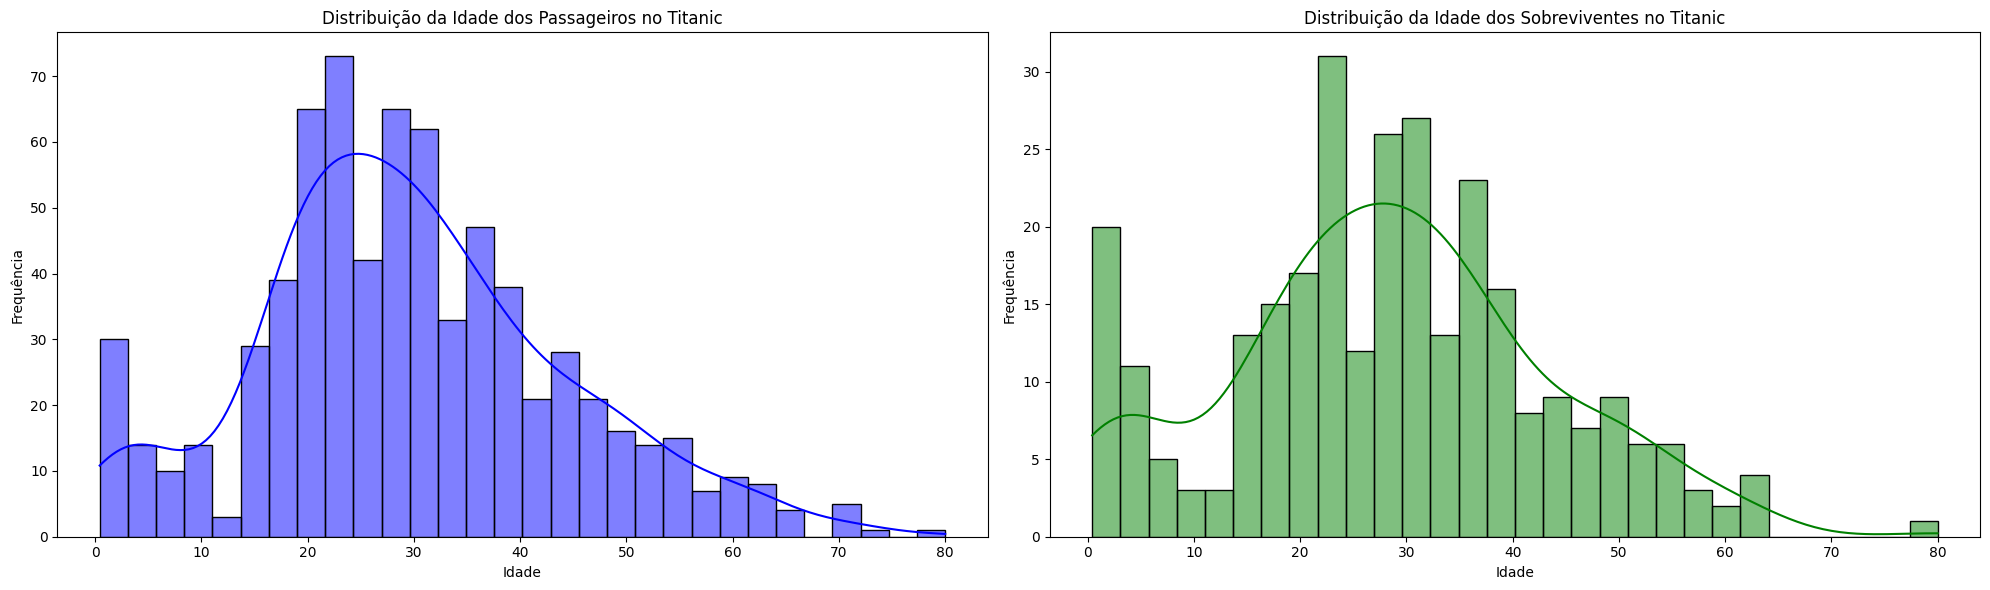

In [7]:
# Criação da figura e dos eixos
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de distribuição da variável 'Age' para todos os passageiros
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Distribuição da Idade dos Passageiros no Titanic')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Filtrando apenas os passageiros sobreviventes
survivors_data = titanic_data[titanic_data['Survived'] == 1]

# Gráfico de distribuição da variável 'Age' apenas para os sobreviventes
sns.histplot(survivors_data['Age'].dropna(), kde=True, bins=30, color='green', ax=axes[1])
axes[1].set_title('Distribuição da Idade dos Sobreviventes no Titanic')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Frequência')

# Ajuste de layout
plt.tight_layout()
plt.show()



A maioria dos passageiros do Titanic tinha entre 20 e 40 anos, o que é visível pelo pico da distribuição neste intervalo de idade. A distribuição tem uma leve assimetria à direita, indicando que há um número maior de passageiros mais jovens, com a frequência diminuindo à medida que a idade aumenta. A distribuição da idade, comparando os passageiros que embarcaram e os que sobreviveram, mostra que esta variável pode ter influenciado a sobrevivência, já que crianças podem ter tido prioridade nos botes salva-vidas.

## Transformação do dataset para inferência usando modelos

In [8]:
# Vamos definir uma função que encapsulará as nossas rotinas de transformação de datasets
def transform_dataset(df, num_imputer, cat_imputer, onehot_encoder, num_variables, cat_variables):

  # Aplicação do numerical imputer
  df[num_variables] = num_imputer.transform(df[num_variables])

  # Aplicação do categorical imputer
  df[cat_variables] = cat_imputer.transform(df[cat_variables])

  # Aplicação do one_hot encoder
  dummy_variables_df = pd.DataFrame(
    data = onehot_encoder.transform(df[cat_variables]).toarray(),
    columns = onehot_encoder.get_feature_names_out(),
    index = df.index
  )
  df = pd.concat([
    df.drop(columns = cat_variables),
    dummy_variables_df
  ], axis = 1)

  return df

## Preparando o modelo

In [9]:
# Definindo colunas numericas
numerical_original_columns = ['Age', 'Fare']

# Definindo colunas categóricas
categorical_original_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Separando as features e o target
X = titanic_data.drop(columns = ['Survived'])
y = titanic_data['Survived']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Ajustando imputers para valores numéricos ausentes com base no conjunto de treinamento
numerical_imputer = SimpleImputer(strategy='mean') # imputaremos os nulos com a média da coluna
numerical_imputer.fit(X_train[numerical_original_columns])

# Ajustando imputers para valores categóricos ausentes com base no conjunto de treinamento
categorical_imputer = SimpleImputer(strategy='most_frequent')  # imputaremos os nulos com a moda da coluna
categorical_imputer.fit(X_train[categorical_original_columns])

# Ajustando um transformador de varáveis categóricas com base no conjunto de treinamento
one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(X_train[categorical_original_columns])

# Transformando o dataset de treinamento de acordo com os objetos ajustados anteriormente
X_train = transform_dataset(
  X_train, numerical_imputer, categorical_imputer, one_hot_encoder,
  numerical_original_columns, categorical_original_columns
)

# Transformando o dataset de teste de acordo com os objetos ajustados em treinamento
X_test = transform_dataset(
  X_test, numerical_imputer, categorical_imputer, one_hot_encoder,
  numerical_original_columns, categorical_original_columns
)


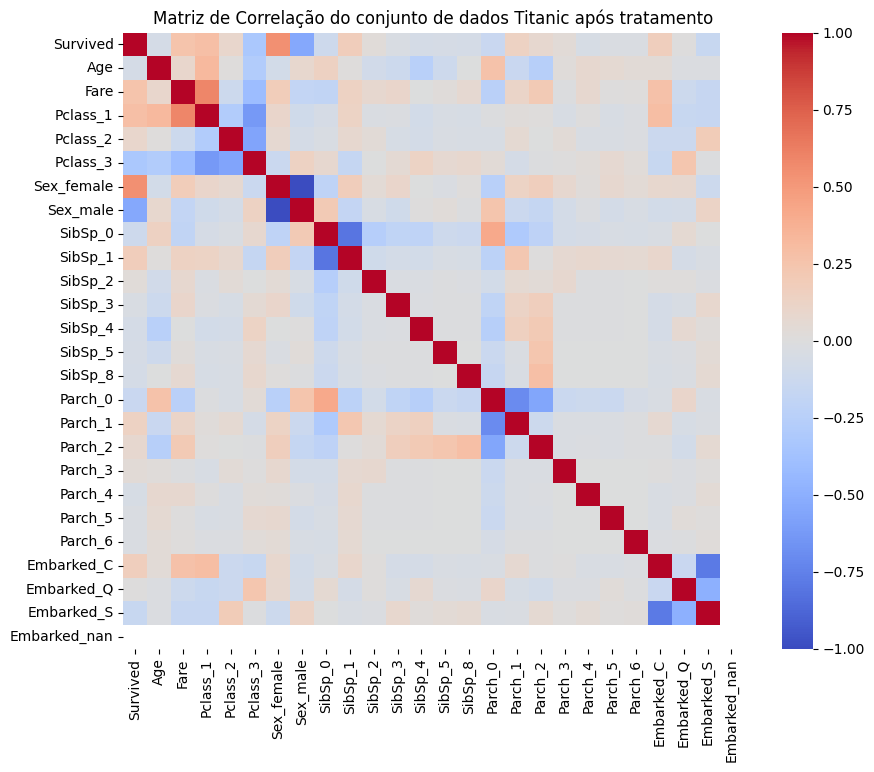

               Age      Fare  Survived
Age       1.000000  0.092258 -0.069172
Fare      0.092258  1.000000  0.257307
Survived -0.069172  0.257307  1.000000


In [10]:
# construindo as correlações
eda_tit = transform_dataset(
  titanic_data, numerical_imputer, categorical_imputer, one_hot_encoder,
  numerical_original_columns, categorical_original_columns
)
correlation_matrix = eda_tit.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação do conjunto de dados Titanic após tratamento')
plt.show()
correlation_num = titanic_data[['Age', 'Fare', 'Survived']].corr()
print(correlation_num)


A partir da matriz de correlação acima, podemos observar que os fatores que mais influenciam a sobrevivência são o sexo e a classe do passageiro. O sexo masculino está negativamente correlacionado com a sobrevivência, enquanto o sexo feminino tem uma correlação positiva. Além disso, a classe do bilhete também desempenha um papel significativo: passageiros da terceira classe têm uma correlação negativa com a sobrevivência, enquanto aqueles da primeira classe apresentam uma correlação positiva. O valor pago pela passagem (corr = 0.257307) também segue essa tendência, onde tarifas mais altas, associadas a classes superiores, estão positivamente correlacionadas com a sobrevivência. Adicionalmente, ter embarcado em Cherbourg está altamente correlacionado com a classe e, consequentemetne, o valor da passagem paga, tendo assim maior taxa de sobrevivência. Idade tem está levemente correlacionado negativamente com a sobrevivência (corr = -0.069172), como havíamos notado pela comparação gráfica anteriormente.

## Árvore de decisão
O dataset do Titanic possui várias variáveis categóricas, que tratamos com One Hot Encoding, tornando o modelo árvore de decisão a escolha óbvia para analisar o dataset, devido à sua capacidade de selecionar automaticamente características mais importantes. 

In [11]:
# Treinando o modelo decision_tree
dec_tree_def_clf = DecisionTreeClassifier()
dec_tree_def_clf.fit(X_train, y_train)

# Predizendo saídas para o dataset de treinamento
y_train_pred = dec_tree_def_clf.predict(X_train)

# Predizendo saídas para o dataset de testes
y_test_pred = dec_tree_def_clf.predict(X_test)

# Calculando AUC em treinamento e em teste
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print(f"AUC_train = {roc_auc_train}, AUC_tes = {roc_auc_test}")

AUC_train = 0.9738811392037198, AUC_tes = 0.7176553672316384


Esse valor de AUC_train indica que o modelo tem um desempenho muito alto no conjunto de treinamento, com uma AUC próxima de 1.0, apontando overfitting. O que é confirmado no conjunto de testes, possuindo pouca generalização.

### Melhorando a performance via grid search

In [12]:
# Definindo o grid de parâmetros a serem testados
param_grid = {
  'criterion': ['gini', 'entropy'],
  'max_depth': [None, 5, 10, 15],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
  estimator = DecisionTreeClassifier(),
  param_grid = param_grid,
  cv = 5
)

# Ajustando o GridSearch ao conjunto de treinamento
grid_search.fit(X_train, y_train)

# Obtendo os melhores parâmetros encontrados
dec_tree_gs_best_params = grid_search.best_params_
print(dec_tree_gs_best_params)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [13]:
# Treinando o modelo com os melhores parâmetros
dec_tree_gs_clf = DecisionTreeClassifier(**dec_tree_gs_best_params)
dec_tree_gs_clf.fit(X_train, y_train)

# Predizendo saídas para o dataset de treinamento
y_train_pred = dec_tree_gs_clf.predict(X_train)

# Predizendo saídas para o dataset de testes
y_test_pred = dec_tree_gs_clf.predict(X_test)

# Calculando AUC em treinamento e em teste
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

print(f"AUC_train = {roc_auc_train}, AUC_tes = {roc_auc_test}")

AUC_train = 0.8069965126416738, AUC_tes = 0.7992937853107345


Aqui em contrapartida, os valores de treino e testes estão mais próximos, em torno de 80%, mostrando que a inferência é bem sucedida. Como referência, o limite de predição é um pouco acima dos 82%, isso usando redes neurais.

#### Conclusão
A análise do dataset do Titanic revela importantes fatores que influenciaram a sobrevivência dos passageiros, como sexo, classe do bilhete e idade pois, mulheres, crianças e passageiros da primeira classe tiveram maiores chances de sobreviver. A utilização de um modelo de Árvore de Decisão permitiu o uso das variáveis mais relevantes, obtendo uma AUC de 0.7993 no conjunto de teste, indicando uma boa capacidade de discriminação entre sobreviventes e não sobreviventes.